AIRBNB ANALYSIS NOTEBOOK

In [1]:
# importing libraries
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Libraries Imported!')


Solving environment: ...working... done

# All requested packages already installed.

Libraries Imported!


In [2]:
# loading AirBNB dataset
air_df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
#viewing dataset
air_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [4]:
#exploring dataset
air_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
# exploring the AirBNB dataframe
air_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
# dropping rows where the price was zero
air_df = air_df[air_df.price != 0]

In [7]:
# dropping rows where the price was more than $500 per night
air_df = air_df[air_df['price'] <= 500]

In [8]:
#dropping minimum nights that are greater than 31 nights
air_df = air_df[air_df['minimum_nights'] <= 31]

In [9]:
air_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.732000e+04,4.732000e+04,47320.000000,47320.000000,47320.000000,47320.000000,47320.000000,37918.000000,47320.000000,47320.000000
mean,1.900563e+07,6.738761e+07,40.728760,-73.951533,131.597633,5.671555,23.686010,1.384488,7.078276,110.547316
std,1.095602e+07,7.838076e+07,0.054791,0.046333,88.061164,8.328379,44.942773,1.688998,32.799261,130.723931
min,2.539000e+03,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.476436e+06,7.849072e+06,40.689790,-73.982570,68.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965975e+07,3.077894e+07,40.722530,-73.955130,101.000000,2.000000,5.000000,0.730000,1.000000,41.500000
75%,2.908170e+07,1.074344e+08,40.763250,-73.935417,173.000000,5.000000,24.000000,2.040000,2.000000,220.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,500.000000,31.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
#importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#importing seaborn
import seaborn as sns

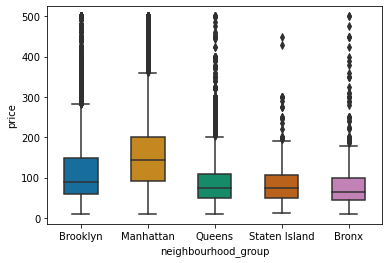

In [12]:
#boxplot of price across the boroughs of NYC
bplot = sns.boxplot(y='price', x='neighbourhood_group', data=air_df, width = 0.5, palette = "colorblind")

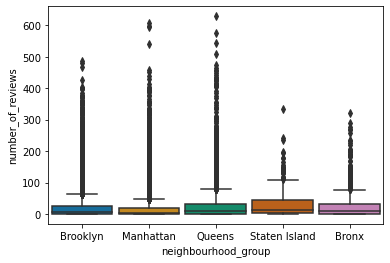

In [213]:
#boxplot of reviews across the boroughs of NYC
mplot = sns.boxplot(y='number_of_reviews', x='neighbourhood_group', data=air_df, width = 0.9, palette = 'colorblind')

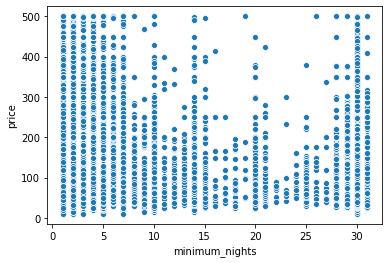

In [13]:
#scatterplot of price and min. nights required for a stay
scplot = sns.scatterplot(y='price',x='minimum_nights', data=air_df)

In [14]:
air_df['minimum_nights'].value_counts()

1     12438
2     11503
3      7796
30     3670
4      3229
5      2969
7      2022
6       733
14      558
10      475
29      331
15      275
20      219
31      195
28      178
21      134
8       130
12       89
25       81
9        80
13       53
11       32
18       28
16       18
27       17
26       16
24       14
17       14
22        8
19        8
23        7
Name: minimum_nights, dtype: int64

In [15]:
#installing geopy
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
print("Geopy installed")

Solving environment: ...working... done

# All requested packages already installed.

Geopy installed


In [17]:
#determining latitide and longitude of New York
address = 'New York City, NY'
geolocater = Nominatim(user_agent='ny_explorer')
location = geolocater.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The coordinates of NYC are {},{}.".format(latitude,longitude))

The coordinates of NYC are 40.7127281,-74.0060152.


In [18]:
# visualising Map of AirBnBs across New York - limited to 100 for ease of loading
air_df_100 = air_df.head(100)

map_newyork = folium.Map(location=[latitude,longitude],zoom_start=10)

for lat, lng, neighbourhood_group, neighbourhood in zip(air_df_100['latitude'], air_df_100['longitude'], air_df_100['neighbourhood_group'], air_df_100['neighbourhood']):
    label = '{}. {}'.format(neighbourhood, neighbourhood_group)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng], radius=5, popup=label, color='blue',fill=True,fill_color='#3186cc',fill_opacity=0.7,parse_html=False).add_to(map_newyork)
 
map_newyork

In [19]:
#importing requests and json
import requests
from pandas.io.json import json_normalize
import json

In [20]:
#setting up FourSquare API
url = 'https://api.foursquare.com/v2/venues/search'
params = dict(
client_id='*****',
client_secret='****',
v='20180323',
ll='40.7127281,-74.0060152',
query='museum',
limit=50
)
results = requests.get(url=url, params=params)
results

<Response [200]>

In [21]:
response_data = results.json()

In [22]:
venues= response_data['response']['venues']

In [23]:
nyc_df = pd.json_normalize(venues)

In [24]:
#dataframe with FourSquare Data
nyc_df

,id,name,categories,verified,referralId,venueChains,hasPerk,location.address,location.crossStreet,location.lat,...,hereNow.summary,hereNow.groups,venuePage.id,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood
0,4b6b5abff964a520fb022ce3,National September 11 Memorial & Museum (Natio...,"[{'id': '5642206c498e4bfca532186c', 'name': 'M...",True,v-1596075445,[],False,180 Greenwich St,btwn Liberty & Fulton St,40.711349,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49d4bb1bf964a5204b5c1fe3,Museum of Jewish Heritage,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",False,v-1596075445,[],False,36 Battery Pl,just NW of Battery Park,40.705922,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4bac00a1f964a52025dd3ae3,Museum of Chinese in America (MOCA),"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",True,v-1596075445,[],False,215 Centre St,btwn Howard & Grand St,40.719361,...,Nobody here,[],58596016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5df18d37db204c00076d525a,Museum Of Ice Cream NYC,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",False,v-1596075445,[],False,558 Broadway,NaN,40.723917,...,Nobody here,[],NaN,2116918,https://www.seamless.com/menu/museum-of-ice-cr...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN
4,4ab67030f964a520187720e3,South Street Seaport Museum,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",True,v-1596075445,[],False,12 Fulton St,btwn Water and South St,40.707204,...,Nobody here,[],89016396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4e70a36d922e8e01baadf45c,National September 11 Memorial Museum,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",True,v-1596075445,[],False,180 Greenwich St,btwn Liberty & Fulton St,40.711467,...,Nobody here,[],83931587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,421a7600f964a5209d1f1fe3,Whitney Museum of American Art,"[{'id': '4bf58dd8d48988d18f941735', 'name': 'A...",True,v-1596075445,[],False,99 Gansevoort St,btwn 10th Ave & Washington St,40.739506,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,Meatpac
7,4ba3fd9bf964a520147538e3,Leslie+Lohman Museum of Gay & Lesbian Art,"[{'id': '4bf58dd8d48988d1e2931735', 'name': 'A...",False,v-1596075445,[],False,28-26 Wooster St,Grand St,40.721780,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,576c0c9a498e5fc81569784f,9/11 Museum Foundation Hall,"[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",False,v-1596075445,[],False,180 Greenwich St,NaN,40.711549,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4b37a3c9f964a5207e4325e3,Museum at Eldridge Street,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",True,v-1596075445,[],False,12 Eldridge St,btwn Canal & Division St,40.714724,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
nyc_df.head()


,id,name,categories,verified,referralId,venueChains,hasPerk,location.address,location.crossStreet,location.lat,...,hereNow.summary,hereNow.groups,venuePage.id,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood
0,4b6b5abff964a520fb022ce3,National September 11 Memorial & Museum (Natio...,"[{'id': '5642206c498e4bfca532186c', 'name': 'M...",True,v-1596075445,[],False,180 Greenwich St,btwn Liberty & Fulton St,40.711349,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49d4bb1bf964a5204b5c1fe3,Museum of Jewish Heritage,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",False,v-1596075445,[],False,36 Battery Pl,just NW of Battery Park,40.705922,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4bac00a1f964a52025dd3ae3,Museum of Chinese in America (MOCA),"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",True,v-1596075445,[],False,215 Centre St,btwn Howard & Grand St,40.719361,...,Nobody here,[],58596016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5df18d37db204c00076d525a,Museum Of Ice Cream NYC,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",False,v-1596075445,[],False,558 Broadway,NaN,40.723917,...,Nobody here,[],NaN,2116918,https://www.seamless.com/menu/museum-of-ice-cr...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN
4,4ab67030f964a520187720e3,South Street Seaport Museum,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",True,v-1596075445,[],False,12 Fulton St,btwn Water and South St,40.707204,...,Nobody here,[],89016396,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
nyc_df.dtypes

id                                object
name                              object
categories                        object
verified                            bool
referralId                        object
venueChains                       object
hasPerk                             bool
location.address                  object
location.crossStreet              object
location.lat                     float64
location.lng                     float64
location.labeledLatLngs           object
location.distance                  int64
location.postalCode               object
location.cc                       object
location.city                     object
location.state                    object
location.country                  object
location.formattedAddress         object
stats.tipCount                     int64
stats.usersCount                   int64
stats.checkinsCount                int64
stats.visitsCount                  int64
beenHere.count                     int64
beenHere.lastChe

In [27]:
# visualising map of museums
for lat, lng, name in zip(nyc_df['location.lat'], nyc_df['location.lng'], nyc_df['name']):
    label = '{}.'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker([lat,lng], radius=5, popup=label, color='green',fill=True,fill_color='#3186cc',fill_opacity=0.7,parse_html=False).add_to(map_newyork)

In [28]:
map_newyork

In [29]:
# inserting a distance column into the dataframe

air_df_ll = air_df

air_df_ll.insert(loc=3, column='distance', value=['0' for i in range(air_df_ll.shape[0])])

air_df_ll


,id,name,host_id,distance,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,0,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,0,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,0,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,0,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [30]:
#determining latitide and longitude of Central Park
address = 'Central Park, NY'
geolocater = Nominatim(user_agent='park_explorer')
location = geolocater.geocode(address)
cpark_latitude = location.latitude
cpark_longitude = location.longitude
cpark = (cpark_latitude,cpark_longitude)

print("The coordinates of Central Park are {},{}.".format(cpark_latitude,cpark_longitude))

The coordinates of Central Park are 40.7827725,-73.9653627406542.


In [31]:
air_df_ll.dropna()

,id,name,host_id,distance,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,0,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,0,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,0,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87
48805,36442252,1B-1B apartment near by Metro,273841667,0,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,2019-07-07,2.00,1,40


In [32]:
#calculating distance of AirBnB from Central Park
from geopy.distance import geodesic
pd.options.mode.chained_assignment = None

test = (40.64,-73.97)

print(geodesic(test,cpark).km)

for ind in air_df_ll.index:
    coord= [[air_df_ll['latitude'][ind], air_df_ll['longitude'][ind]]]
    dist = (geodesic(coord,cpark).km)
    air_df_ll['distance'][ind] = dist


15.859489852271327


In [59]:
#data cleaning
air_df_ll.dropna()
air_df_ll['reviews_per_month'].fillna(value=0)
air_df_ll

,id,name,host_id,distance,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,15.0346,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,3.59107,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,3.52375,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,10.8523,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,2.51162,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,11.649,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,9.38978,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,3.82031,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,3.54952,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [46]:
air_df_ll['distance'].astype(str).astype(float).astype(int)

0        15
1         3
2         3
3        10
4         2
         ..
48890    11
48891     9
48892     3
48893     3
48894     2
Name: distance, Length: 47320, dtype: int32

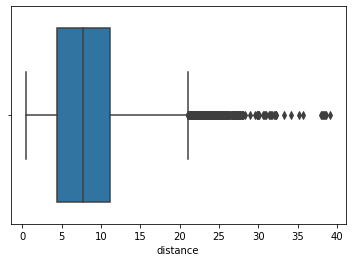

In [55]:
#boxplot of distance from Central Park
distance_box = sns.boxplot(air_df_ll['distance'])

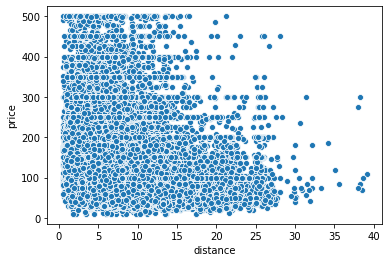

In [56]:
#scatterplot of distance from Central Park and price
price_scatter = sns.scatterplot(x='distance', y='price', data=air_df_ll)

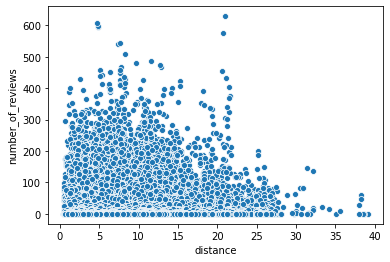

In [60]:
#scatterplot of distance and reviews
review_scatter = sns.scatterplot(x='distance', y='number_of_reviews', data=air_df_ll)

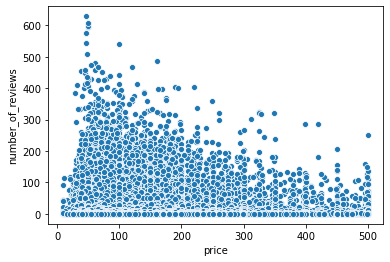

In [62]:
#scatterplot of price and reviews
price_review_scatter = sns.scatterplot(x='price', y='number_of_reviews', data=air_df_ll)

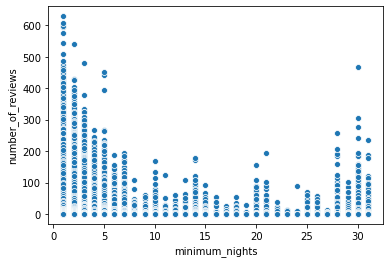

In [63]:
#scatterplot of min. nights and reviews
nights_review_scatter = sns.scatterplot(x='minimum_nights', y='number_of_reviews', data=air_df_ll)

In [64]:
# build a regression model to determine if distance has an effect on number of reviews, which can be used as a proxy for bookings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [201]:
X = air_df_ll['distance'].values.reshape(-1,1)
Y = air_df_ll['number_of_reviews'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

In [202]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression()

In [203]:
# intercept and coefficient
print(regressor.intercept_)
print(regressor.coef_)

[20.17457506]
[[0.4907907]]


In [204]:
Y_pred = regressor.predict(X_test)

In [74]:
# Comparing predicted and actual values
df = pd.DataFrame({'Actual' : Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,1,22.918748
1,18,23.773537
2,125,25.485984
3,23,25.200217
4,0,21.604571
...,...,...
9459,25,23.932106
9460,22,22.118273
9461,18,22.474222
9462,0,24.050029


In [205]:
# printing metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 27.837167194189615
Mean Squared Error: 2031.4070883341553
Root Mean Squared Error: 45.07113364820276


In [75]:
# polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

In [110]:
polynomial = PolynomialFeatures(degree=8)

x_poly = polynomial.fit_transform(X)

In [111]:
model = LinearRegression()
model.fit(x_poly,Y)
y_poly_pred = model.predict(x_poly)

In [112]:
# printing metrics
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print(rmse)
print(r2)

41.92844222288853
0.12962399168126693


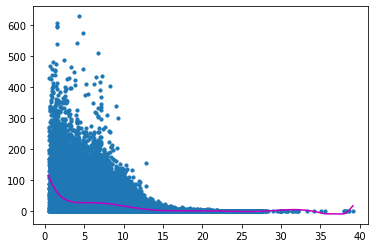

In [113]:
# visualising regression model and line of best fit
import operator
plt.scatter(X, Y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
X, y_poly_pred = zip(*sorted_zip)
plt.plot(X, y_poly_pred, color='m')
plt.show()

In [132]:
# setting up multiple linear regression model
X = air_df_ll[['price', 'minimum_nights']]
Y = air_df_ll['number_of_reviews']

In [133]:

print(X.shape)
print(Y.shape)

(47320, 2)
(47320,)


In [135]:


X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 


print(regressor.intercept_)
print(regressor.coef_)

30.858571135925278
[-0.02091777 -0.77491767]


In [147]:
Y_pred = regressor.predict(X_test)
print(Y_pred)

[23.40416385 26.44204159 26.02368628 ... 27.2787522  18.08432899
 23.96990387]


In [141]:
print(Y_test.shape)
print(Y_pred.shape)

(9464,)
(9464,)


In [143]:
Y_test = np.array(list(Y_test))
Y_pred = np.array(list(Y_pred))

In [145]:
# MLR metrics
df = pd.DataFrame({'Actual' : Y_test.flatten(), 'Predicted' : Y_pred.flatten()})
df

,Actual,Predicted
0,1,23.404164
1,18,26.442042
2,125,26.023686
3,23,25.857305
4,0,20.309295
...,...,...
9459,25,29.560709
9460,22,28.305643
9461,18,27.278752
9462,0,18.084329


In [148]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 27.263573709781177
Mean Squared Error: 1984.5712120788226
Root Mean Squared Error: 44.548526486055884


In [157]:
# polynomial multiple linear regression and metrics
polynomial = PolynomialFeatures(degree=2)

x_poly = polynomial.fit_transform(X)

model = LinearRegression()
model.fit(x_poly,Y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(Y,y_poly_pred))
r2 = r2_score(Y,y_poly_pred)
print(rmse)
print(r2)


44.167118750158835
0.03419912484565679


In [ ]:
#determining latitide and longitude of Soho
address = 'Soho, NY'
geolocater = Nominatim(user_agent='soho_explorer')
location = geolocater.geocode(address)
latitude = location.latitude
longitude = location.longitude

print("The coordinates of Soho are {},{}.".format(latitude,longitude))

In [206]:
# Using FourSquare API to call museums within 2km radius of SoHo
url = 'https://api.foursquare.com/v2/venues/search'
params = dict(
client_id='**',
client_secret='******',
v='20180323',
ll='40.7127281,-74.0060152',
query='museum',
limit=50,
radius=2000
)
results = requests.get(url=url, params=params)
results

<Response [200]>

In [207]:
response_data = results.json()
venues= response_data['response']['venues']
soho_df = pd.json_normalize(venues)

In [208]:
soho_df

,id,name,categories,verified,referralId,venueChains,hasPerk,location.address,location.crossStreet,location.lat,...,hereNow.summary,hereNow.groups,venuePage.id,delivery.id,delivery.url,delivery.provider.name,delivery.provider.icon.prefix,delivery.provider.icon.sizes,delivery.provider.icon.name,location.neighborhood
0,4b6b5abff964a520fb022ce3,National September 11 Memorial & Museum (Natio...,"[{'id': '5642206c498e4bfca532186c', 'name': 'M...",True,v-1596104365,[],False,180 Greenwich St,btwn Liberty & Fulton St,40.711349,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49d4bb1bf964a5204b5c1fe3,Museum of Jewish Heritage,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",False,v-1596104365,[],False,36 Battery Pl,just NW of Battery Park,40.705922,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4ab67030f964a520187720e3,South Street Seaport Museum,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",True,v-1596104365,[],False,12 Fulton St,btwn Water and South St,40.707204,...,Nobody here,[],89016396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5df18d37db204c00076d525a,Museum Of Ice Cream NYC,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",False,v-1596104365,[],False,558 Broadway,NaN,40.723917,...,Nobody here,[],NaN,2116918,https://www.seamless.com/menu/museum-of-ice-cr...,seamless,https://fastly.4sqi.net/img/general/cap/,"[40, 50]",/delivery_provider_seamless_20180129.png,NaN
4,4bac00a1f964a52025dd3ae3,Museum of Chinese in America (MOCA),"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",True,v-1596104365,[],False,215 Centre St,btwn Howard & Grand St,40.719361,...,Nobody here,[],58596016,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4e70a36d922e8e01baadf45c,National September 11 Memorial Museum,"[{'id': '4bf58dd8d48988d190941735', 'name': 'H...",True,v-1596104365,[],False,180 Greenwich St,btwn Liberty & Fulton St,40.711467,...,Nobody here,[],83931587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,576c0c9a498e5fc81569784f,9/11 Museum Foundation Hall,"[{'id': '4deefb944765f83613cdba6e', 'name': 'H...",False,v-1596104365,[],False,180 Greenwich St,NaN,40.711549,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4ba3fd9bf964a520147538e3,Leslie+Lohman Museum of Gay & Lesbian Art,"[{'id': '4bf58dd8d48988d1e2931735', 'name': 'A...",False,v-1596104365,[],False,28-26 Wooster St,Grand St,40.721780,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4b37a3c9f964a5207e4325e3,Museum at Eldridge Street,"[{'id': '4bf58dd8d48988d181941735', 'name': 'M...",True,v-1596104365,[],False,12 Eldridge St,btwn Canal & Division St,40.714724,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5376a2e011d20d02a0831221,9/11 Museum Gift Shop,"[{'id': '4bf58dd8d48988d128951735', 'name': 'G...",False,v-1596104365,[],False,180 Greenwich St,at Liberty St,40.711646,...,Nobody here,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [209]:
# average lat and long of museums in SoHo
soho_df_ll = soho_df[['location.lat', 'location.lng']]
meanlat = soho_df_ll.mean()
print('The average latitude and longitude of museums in Soho are {}.'.format(meanlat))
soho_cord = (40.720983, -74.002086)

The average latitude and longitude of museums in Soho are location.lat    40.718067
location.lng   -74.001689
dtype: float64.


In [210]:
#creating a copy of the AirBnb dataframe and inserting distance column

air_df_soho = air_df
air_df_soho.insert(loc=3, column='distance', value=['0' for i in range(air_df_soho.shape[0])])
air_df_ll

ValueError: cannot insert distance, already exists

In [193]:
# calculating distance of AirBnb from average museum
test = (40.64,-73.97)

print(geodesic(test,soho_cord).km)

for ind in air_df_soho.index:
    coord= [[air_df_soho['latitude'][ind], air_df_soho['longitude'][ind]]]
    dist = (geodesic(coord,soho_cord).km)
    air_df_soho['distance'][ind] = dist

9.393168960668234


In [194]:
air_df_soho

,id,name,host_id,distance,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,8.5391,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,3.9407,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,11.0183,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,5.35145,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,9.90886,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47315,36484665,Charming one bedroom - newly renovated rowhouse,8232441,6.45294,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
47316,36485057,Affordable room in Bushwick/East Williamsburg,6570630,6.19935,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
47317,36485431,Sunny Studio at Historical Neighborhood,23492952,11.3475,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
47318,36485609,43rd St. Time Square-cozy single bed,30985759,4.16069,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [195]:
#keep AirBnBs only in manhattan
air_df_sohoman = air_df_soho[air_df_soho['neighbourhood_group'] == 'Manhattan'].reset_index(drop=True)
air_df_sohoman

,id,name,host_id,distance,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,3.9407,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,11.0183,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,9.90886,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,3.74402,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
4,5178,Large Furnished Room Near B'way,8967,5.08658,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20599,36483010,Comfy 1 Bedroom in Midtown East,274311461,4.84298,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
20600,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,4.84616,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
20601,36485431,Sunny Studio at Historical Neighborhood,23492952,11.3475,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
20602,36485609,43rd St. Time Square-cozy single bed,30985759,4.16069,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


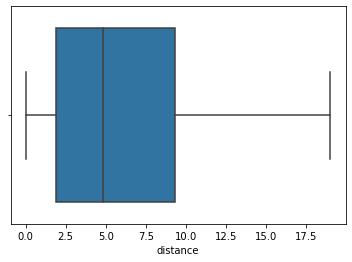

In [196]:
# boxplot of distance from museums
distance_box = sns.boxplot(air_df_sohoman['distance'])

In [197]:
# linear regression model of distance from average museum and number of reviews
X = air_df_sohoman['distance'].values.reshape(-1,1)
Y = air_df_sohoman['number_of_reviews'].values.reshape(-1,1)

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print(regressor.intercept_)
print(regressor.coef_)

[18.99206676]
[[0.42834118]]


In [198]:
Y_pred = regressor.predict(X_test)

In [199]:
# predicted vs. actual values
df = pd.DataFrame({'Actual' : Y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,207,23.435853
1,9,19.782774
2,2,22.531549
3,2,20.138945
4,31,19.441617
...,...,...
4116,34,23.255326
4117,0,22.772570
4118,0,19.867124
4119,1,19.059684


In [200]:
# printing metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 25.956569946006294
Mean Squared Error: 1815.1770265213509
Root Mean Squared Error: 42.60489439631732
